In [29]:
"""
Native Python dates and times
"""

from datetime import datetime

t = datetime(year=2021, month=10, day=27)
print(type(t))

# Build a date using the datetime type

<class 'datetime.datetime'>


In [2]:
# Parse a date from a string
from dateutil import parser

date = parser.parse("27th of October, 2021")
print(date)

2021-10-27 00:00:00


In [3]:
# Print the day of the week

date.strftime('%A')

'Wednesday'

In [4]:
"""
Types Arrays of Times: Numpy's datetime64
"""

# Create datetime64 using array()

import numpy as np
dates = np.array(['2021-10-27', '2021-10-28'], dtype=np.datetime64)
type(dates[0])

# Use datetune64()
date = np.datetime64('2021-10-28')
print(date) 

2021-10-28


In [5]:
# We can quickly do vectorized operations on datetime64
date + np.arange(7) #[0, 1, .. 6]

array(['2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31',
       '2021-11-01', '2021-11-02', '2021-11-03'], dtype='datetime64[D]')

In [7]:
# Minite-based datetime

t = np.datetime64('2021-10-27 09:27')
print(t)

2021-10-27T09:27


In [8]:
# Nanosecond-based datetime

t = np.datetime64('2021-10-27 09:27:10.20', 'ns')
print(t)

2021-10-27T09:27:10.200000000


In [9]:
"""
Dates and Times in Pandas
"""

# Parse a string date in pandas

import pandas as pd
date = pd.to_datetime("27th of October, 2021")
print(date)

2021-10-27 00:00:00


In [10]:
# Output the day of the week

print(date.strftime('%A'))

Wednesday


In [11]:
# NumPy-style vectorized operations

date + pd.to_timedelta(np.arange(7))

DatetimeIndex([          '2021-10-27 00:00:00',
               '2021-10-27 00:00:00.000000001',
               '2021-10-27 00:00:00.000000002',
               '2021-10-27 00:00:00.000000003',
               '2021-10-27 00:00:00.000000004',
               '2021-10-27 00:00:00.000000005',
               '2021-10-27 00:00:00.000000006'],
              dtype='datetime64[ns]', freq=None)

In [12]:
"""
Pandas Time Series: Indexing by Time
"""

# Indexing by timestamps

ind = pd.DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
                        '2021-10-31', '2021-11-01', '2021-11-02'])

print(ind)

DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02'],
              dtype='datetime64[ns]', freq=None)


In [13]:
ser = pd.Series([0, 1, 2, 3, 4, 5, 6], index = ind)
print(ser)

2021-10-27    0
2021-10-28    1
2021-10-29    2
2021-10-30    3
2021-10-31    4
2021-11-01    5
2021-11-02    6
dtype: int64


In [14]:
# Indexing patterns

print(ser['2021-10-27' : '2021-10-31'], '\n')

print(ser['2021-11'])

2021-10-27    0
2021-10-28    1
2021-10-29    2
2021-10-30    3
2021-10-31    4
dtype: int64 

2021-11-01    5
2021-11-02    6
dtype: int64


In [15]:
"""
Pandas Time Series Data Structures
"""

# Timestamp and DatetimeIndex

dates = pd.to_datetime([datetime(2015, 7, 3),
                       "4th of July, 2015",
                       '2015-Jul-6',
                       '07-07-2015',
                       '20150708'])

print(dates)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)


In [16]:
# DatetimeIndex -> PeriodIndex with to_period()

dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [17]:
#TimedeltaIndex

dates - dates[0]


TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [18]:
"""
Regular Sequences
"""

# pd.date_range(). default freq: day

pd.date_range('2021-10-27', '2021-10-31')

DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31'],
              dtype='datetime64[ns]', freq='D')

In [20]:
# Use startpoint and num. of periods

pd.date_range('2021-10-27', periods=5)

DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31'],
              dtype='datetime64[ns]', freq='D')

In [21]:
# Change the prequency

pd.date_range('2021-10-27', periods=12, freq='H')

DatetimeIndex(['2021-10-27 00:00:00', '2021-10-27 01:00:00',
               '2021-10-27 02:00:00', '2021-10-27 03:00:00',
               '2021-10-27 04:00:00', '2021-10-27 05:00:00',
               '2021-10-27 06:00:00', '2021-10-27 07:00:00',
               '2021-10-27 08:00:00', '2021-10-27 09:00:00',
               '2021-10-27 10:00:00', '2021-10-27 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [22]:
# pd.period_range()
pd.period_range('2021-10', periods=12, freq='M')

PeriodIndex(['2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
             '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09'],
            dtype='period[M]', freq='M')

In [23]:
# pd.timedelta_range()

pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [24]:
"""
Frequencies and Offsets
"""

# Frequency codes

print(pd.date_range('2021-11-01', periods=10, freq="M"))
print(pd.date_range('2021-11-01', periods=10, freq="BM"))


DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31'],
              dtype='datetime64[ns]', freq='M')
DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-29', '2022-05-31', '2022-06-30',
               '2022-07-29', '2022-08-31'],
              dtype='datetime64[ns]', freq='BM')


In [25]:
# Adding the suffix 'S': set into the beginning-based sequences

print(pd.date_range('2021-11-01', periods=10, freq="MS"))

DatetimeIndex(['2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01'],
              dtype='datetime64[ns]', freq='MS')


In [26]:
# Combining with numbers

pd.date_range('2021-11-01', periods=9, freq='2H30T')

DatetimeIndex(['2021-11-01 00:00:00', '2021-11-01 02:30:00',
               '2021-11-01 05:00:00', '2021-11-01 07:30:00',
               '2021-11-01 10:00:00', '2021-11-01 12:30:00',
               '2021-11-01 15:00:00', '2021-11-01 17:30:00',
               '2021-11-01 20:00:00'],
              dtype='datetime64[ns]', freq='150T')

In [27]:
# Offsets

from pandas.tseries.offsets import DateOffset
ts = pd.Timestamp('2021-10-31 23:28:30')
ts + DateOffset(hours=40)

ts - DateOffset(years = 71, months = 4, days = 5, hours = 19, minutes = 28, seconds = 30)

Timestamp('1950-06-25 04:00:00')

In [31]:
"""
Time Series-specific Operations
"""

# Get time series of stock prices from Yahoo Finance

from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2021',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [32]:
# Use only closing prices

goog = goog['Close']

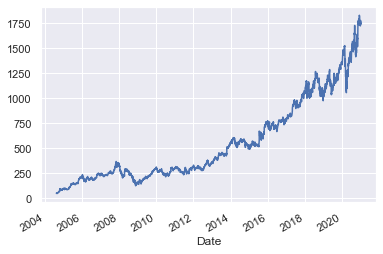

In [34]:
# Visualization setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles
%config inlineBackend.figure_format = 'svg'

goog.plot();

In [35]:
# Resampleing (down sampling)

goog.resample('Q').mean()


Date
2004-09-30      55.211886
2004-12-31      85.182200
2005-03-31      94.299493
2005-06-30     120.979508
2005-09-30     147.513490
                 ...     
2019-12-31    1290.565161
2020-03-31    1356.975803
2020-06-30    1349.559919
2020-09-30    1525.829367
2020-12-31    1687.301720
Freq: Q-DEC, Name: Close, Length: 66, dtype: float64

In [37]:
# Resampling (up sampling)

goog.resample('H').max()

Date
2004-08-19 00:00:00      49.982655
2004-08-19 01:00:00            NaN
2004-08-19 02:00:00            NaN
2004-08-19 03:00:00            NaN
2004-08-19 04:00:00            NaN
                          ...     
2020-12-30 20:00:00            NaN
2020-12-30 21:00:00            NaN
2020-12-30 22:00:00            NaN
2020-12-30 23:00:00            NaN
2020-12-31 00:00:00    1751.880005
Freq: H, Name: Close, Length: 143473, dtype: float64

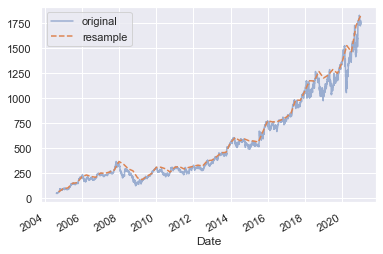

In [38]:
# Visualization of resampled data

goog.plot(alpha = 0.5, style = '-') # add the original data to the plot

goog.resample('Q').max().plot(style = '--')

plt.legend(['original', 'resample'], loc = 'upper left');


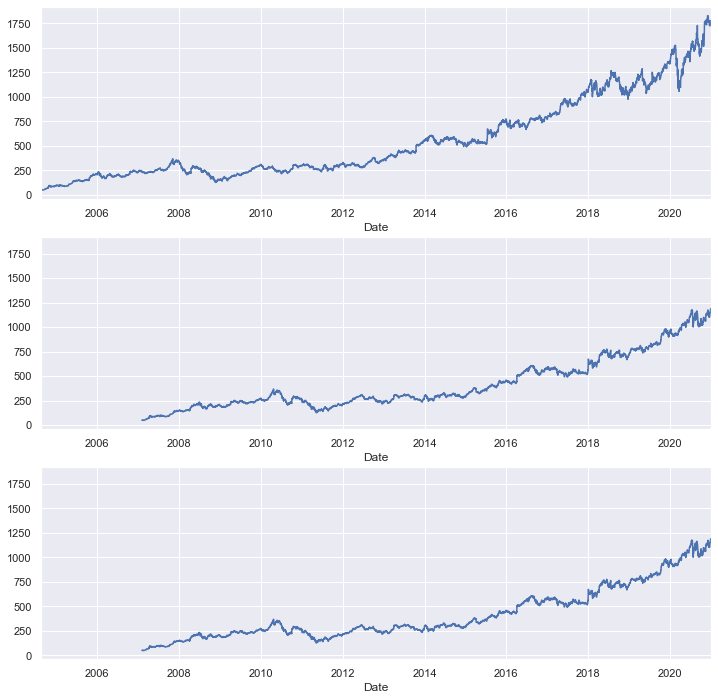

In [39]:
"""
Time-shifts
"""

# shift() and tshift() by 900 days

fig, ax = plt.subplots(3, sharey = True, figsize = (12, 12))

# Apply a frequency to the data
goog = goog.asfreq('D', method = 'pad') # 'pad' = forward fill NaN values(

goog.plot(ax=ax[0])
goog.shift(900).plot(ax = ax[1])
goog.shift(900).plot(ax = ax[2])

In [44]:
# Legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

TypeError: 'AxesSubplot' object is not subscriptable

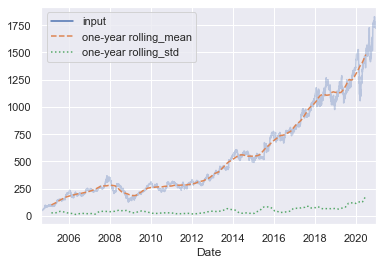

In [42]:
"""
Rolling Windows
"""

rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)